In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets

np.random.seed(0)

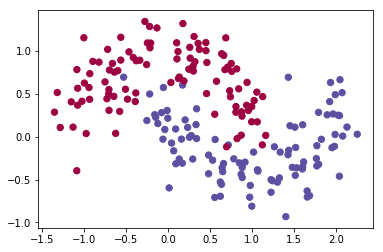

In [2]:
x, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
i_size = x.shape[1]
h_size = 3
o_size = 2

In [4]:
#  sample weights from a normal distribution
w0 = np.random.randn(i_size, h_size)
b0 = np.zeros((1, h_size))

w1 = np.random.randn(h_size, o_size)
b1 = np.zeros((1, o_size))

w = [w0, w1]
b = [b0, b1]

In [5]:
n_samples = 4
sample_x, sample_y = x[:n_samples], y[:n_samples]

In [6]:
def forward(x, w, b):
    #  input -> hidden
    z0 = x.dot(w[0]) + b[0]
    a0 = np.tanh(z0)

    #  hidden -> output
    z1 = a0.dot(w[1]) + b[1]

    #  softmax
    probs = np.exp(z1) / np.sum(np.exp(z1), axis=1, keepdims=True)
    preds = np.argmax(probs, axis=1)
    
    return z0, a0, z1, probs, preds

z0, a0, z1, probs, preds = forward(sample_x, w, b)

In [7]:
sample_y.shape

(4,)

In [8]:
def log_likelihood_loss(probs, y):
    #  select probs for the correct classes
    errors = probs[range(y.shape[0]), y]
    log_probs = -np.log(errors)
    loss = np.mean(log_probs)
    return errors, log_probs, loss

errors, log_probs, loss = log_likelihood_loss(probs, sample_y)
loss

1.4402032156938522

In [9]:
def backward(w, b, z0, a0, z1, probs, preds, y, x):
    d2 = probs
    d2[range(y.shape[0]), y] -= 1
    dw1 = (a0.T).dot(d2)
    db1 = d2
    
    d1 = d2.dot(w[1].T) * (1 - np.power(a0, 2))
    dw0 = np.dot(x.T, d1)
    db0 = d1
    
    lr = 0.01
    reg = 0.01

    dw1 += reg * w1
    dw0 += reg * w0

    w[0] += -lr * dw0
    b[0] += -lr * np.sum(db0, 0, keepdims=True)
    w[1] += -lr * dw1
    b[1] += -lr * np.sum(db1, 0, keepdims=True)
    return w, b

In [10]:
hist = []
for _ in range(100):
    z0, a0, z1, probs, preds = forward(x, w, b)
    hist.append(np.mean(log_likelihood_loss(probs, y)))
    w, b = backward(w, b, z0, a0, z1, probs, preds, y, x)

In [11]:
z0, a0, z1, probs, preds = forward(x, w, b)

In [12]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [13]:
x.shape

(200, 2)

In [14]:
y.shape

(200,)

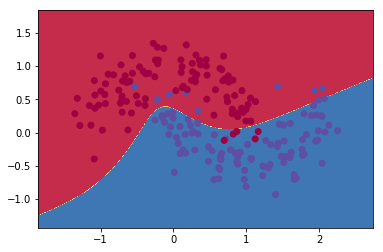

In [15]:
#  these refer to the axes of features only - not feature and target
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5

h = 0.01

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z0, a0, z1, probs, preds = forward(np.c_[xx.ravel(), yy.ravel()], w, b)
preds = preds.reshape(xx.shape)
plt.contourf(xx, yy, preds, cmap=plt.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)